In [3]:
import numpy as np 
import sympy as sym
import matplotlib.pyplot as plt

In [4]:
x=sym.Symbol('x', real=True)

In [5]:
def GetLaguerre(n,x):
    poly=0
    if n==0:
        poly=1
    elif n==1:
        poly=1-x
    else:
        poly=(((2*n-1-x)*GetLaguerre(n-1,x))-((n-1)*GetLaguerre(n-2,x)))/n
    return sym.simplify(poly)

In [6]:
GetLaguerre(4,x)

x**4/24 - 2*x**3/3 + 3*x**2 - 4*x + 1

In [7]:
def GetNewton(f,df,xn,itmax=10000,precision=1e-14):
    
    error = 1.
    it = 0
    
    while error >= precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(xn)
            
            error = np.abs(f(xn)/df(xn))
            
        except ZeroDivisionError:
            print('Zero Division')
            
        xn = xn1
        it += 1
        
    if it == itmax:
        return False
    else:
        return xn

In [8]:
def GetAllRoots(x,f,df, tolerancia=10):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewton(f,df,i)
        
        if type(root)!=bool:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort()
    
    return Roots

In [9]:
def GetAllRootsGLag(n):
    xn=np.linspace(0,n+(n-1)*np.sqrt(n),100)
    polinomio=[]
    Derivada=[]
    for i in range(n+1):
        polinomio.append(GetLaguerre(i,x))
        Derivada.append(sym.simplify(sym.diff(GetLaguerre(i,x),x,1)))
    Poly=sym.lambdify([x],polinomio[n],'numpy')
    Dpoly=sym.lambdify([x], Derivada[n],'numpy')
    return GetAllRoots(xn,Poly,Dpoly)
    

In [10]:
def GetWeightsGLag(n):
    roots=GetAllRootsGLag(n)
    poly=[]
    for i in range(n+2):
        poly.append(GetLaguerre(i,x))
    pl=sym.lambdify([x], poly[n+1], 'numpy')
    c=roots/(((n+1)**2)*((pl(roots))**2))
    return c

In [11]:
#Comoprobar Integral
pesos=GetWeightsGLag(4)
funcion=lambda x: np.cos(x)
raices=GetAllRootsGLag(4)
pesos,raices

(array([6.03154105e-01, 3.57418692e-01, 3.88879085e-02, 5.39294706e-04]),
 array([0.32254769, 1.7457611 , 4.5366203 , 9.39507091]))

In [12]:
I = 0
for i in range(4):
    I += pesos[i]*funcion(raices[i])
print(I)

0.5024937057715209


In [13]:
def GetHermite(n,x):
    if n==0:
        poly=1
    else:
        poly=(2*x*GetHermite(n-1,x))-(sym.diff(GetHermite(n-1,x),x,1))
    return sym.simplify(poly)

In [14]:
GetHermite(4,x)

16*x**4 - 48*x**2 + 12

In [15]:
def GetAllRootsGHer(n):
    xn=np.linspace(-np.sqrt(4*n+1),np.sqrt(4*n+1))
    polinomio=[]
    derivada=[]
    for i in range(n+1):
        polinomio.append(GetHermite(i,x))
        derivada.append(sym.diff(GetHermite(i,x),x,1))
    poly=sym.lambdify([x],polinomio[n],'numpy')
    Dpoly=sym.lambdify([x],derivada[n],'numpy')
    return GetAllRoots(xn,poly,Dpoly)

In [16]:
def GetWeightsGHer(n):
    xk=GetAllRootsGHer(n)
    polinomio=[]
    for i in range(n+1):
        polinomio.append(GetHermite(i,x))
    poly=sym.lambdify([x],polinomio[n-1],'numpy')
    pesos=((2**(n-1))*np.math.factorial(n)*(np.sqrt(np.pi)))/((n**2)*(poly(xk)**2))
    return pesos

In [17]:
#Comprobar Integral
f=lambda x: x**2
r=GetAllRootsGHer(3)
p=GetWeightsGHer(3)
r,p

(array([-1.22474487,  0.        ,  1.22474487]),
 array([0.29540898, 1.1816359 , 0.29540898]))

In [18]:
I=0
for i in range(3):
    I+=p[i]*f(r[i])
I

0.8862269254284135

In [19]:
#3.3 PUNTO 1
#Distribución de velocidades
N=5
pesos=GetWeightsGLag(N)
raices=GetAllRootsGLag(N)
funcion_fu=lambda x: (2/np.sqrt(np.pi))*np.sqrt(x)

In [20]:
Integral=0
for i in range(N):
    Integral+=pesos[i]*funcion_fu(raices[i])
Integral

1.0105058623263745

In [21]:
#PUNTO 2
M=3
R=8.31446
v=np.linspace(0,100,1000)
T=5

In [22]:
def distribucion_vel(M,v,T):
    P=(M/(2*np.pi*R*T))**(3/2)
    u=(M*(v**2)/(2*R*T))
    pv=(4*np.pi)*P*(v**2)*np.exp(-u)
    return pv

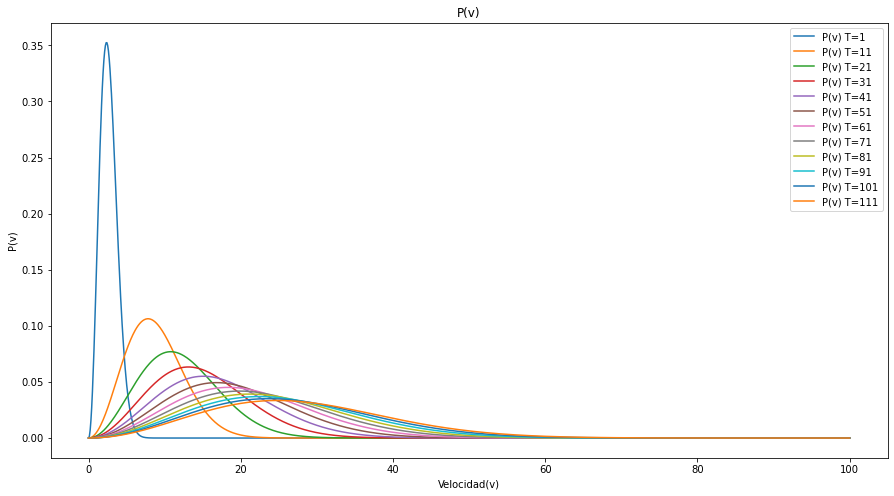

In [23]:
fig,ax=plt.subplots(figsize=(15,8))
T=1
for i in range(3):
    for j in range(4):
        ax.plot(v,distribucion_vel(M,v,T), label="P(v) T={}".format(str(T)))
        ax.set_ylabel('P(v)')
        ax.set_xlabel('Velocidad(v)')
        ax.set_title('P(v)')
        T+=10
plt.legend()
plt.show()
#Entre más aumenta la velocidad y la temperatura del gas, se reduce la probabilidad de que este tome dichos valores, por esto en T=1 hay una alta probabilidad que a una temperatura baja tenga una baja velocidad

In [24]:
#PUNTO 3
N=5
R=8.31446
pesos=GetWeightsGLag(N)
raices=GetAllRootsGLag(N)

In [25]:
def velocidad_promedio(M,v,R):
    velocidad_promedio=[]
    Temperatura=[]
    T=1
    for i in range(10):
        Integral=0
        f=lambda x:np.sqrt((2*x*R*T)/M)*(2/np.sqrt(np.pi))*np.sqrt(x)
        for j in range(N):
            Integral+=pesos[j]*f(raices[j])    
        velocidad_promedio.append(Integral)
        Temperatura.append(T)
        T+=20
    return velocidad_promedio,Temperatura

In [26]:
velocidad_p,temperaturas=velocidad_promedio(M,v,R)

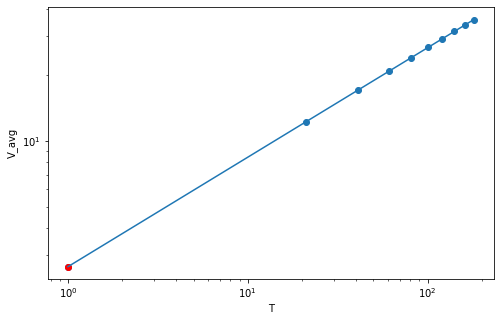

In [27]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(temperaturas,velocidad_p)
ax.scatter(temperaturas,velocidad_p)
ax.scatter(temperaturas[0],velocidad_p[0], color="r")#Punto b de corte con el eje y
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('V_avg')    
ax.set_xlabel('T')
plt.show()

In [28]:
#Verificar
v_avg=np.sqrt((8*R*(1))/(np.pi*M))
punto_corte=velocidad_p[0]
v_avg,punto_corte

(2.6566017472350802, 2.656601747633738)

In [29]:
#PUNTO 4
N=8
R=8.31446
pesos=GetWeightsGLag(N)
raices=GetAllRootsGLag(N)

In [30]:
def velocidad_rms(M,v,R):
    velocidad_rms=[]
    Temperatura=[]
    T=1
    for i in range(10):
        Integral=0
        f=lambda x:((2*R*T*x)/M)*(2/np.sqrt(np.pi))*np.sqrt(x)
        for j in range(N):
            Integral+=pesos[j]*f(raices[j]) 
        Integral=np.sqrt(Integral)
        velocidad_rms.append(Integral)
        Temperatura.append(T)
        T+=20
    return velocidad_rms,Temperatura

In [31]:
velocidad_rm,temperaturas=velocidad_rms(M,v,R)

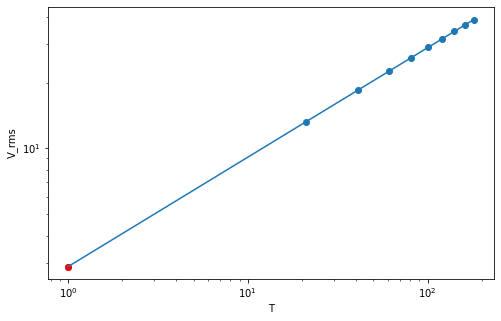

In [32]:
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(temperaturas,velocidad_rm)
ax.scatter(temperaturas,velocidad_rm)
ax.scatter(temperaturas[0],velocidad_rm[0], color="r")#Punto b de corte con el eje y
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('V_rms')    
ax.set_xlabel('T')
plt.show()

In [33]:
#Verificar
v_rms=np.sqrt((3*R*(1))/M)
punto_corte=velocidad_rm[0]
v_rms,punto_corte

(2.883480535741485, 2.8829393970481667)